
### **Task 2:LOAN PREDICTION**


**Import Required Libraries and  Load the Dataset**



In [1]:
import pandas as pd

df = pd.read_csv("loan_approval_dataset.csv")  r
df.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [6]:
print(df.columns.tolist())



['loan_id', ' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']


In [3]:
# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


**See Missing Values**

In [4]:
# View dataset structure
print(" Shape of dataset:", df.shape)
print("\n Column names:", df.columns.tolist())

# View data types and missing values
print("\n Data Types:\n", df.dtypes)
print("\n Missing Values:\n", df.isnull().sum())


 Shape of dataset: (4269, 13)

 Column names: ['loan_id', ' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']

 Data Types:
 loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

 Missing Values:
 loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_

**Encode Categorical Columns**


In [9]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Make a copy of the original dataset
df_encoded = df.copy()

# Step 2: Clean column names by removing leading/trailing spaces
df_encoded.columns = df_encoded.columns.str.strip()

# Step 3: Initialize Label Encoder
le = LabelEncoder()

# Step 4: Encode categorical columns
df_encoded['education'] = le.fit_transform(df_encoded['education'])             # Graduate=1, Not Graduate=0
df_encoded['self_employed'] = le.fit_transform(df_encoded['self_employed'])     # Yes=1, No=0
df_encoded['loan_status'] = le.fit_transform(df_encoded['loan_status'])         # Approved=0, Rejected=1



In [10]:
df_encoded.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


**Step 6: Visualize Distribution of Loan Amount**


In [13]:
# Clean column names (strip leading/trailing spaces)
df.columns = df.columns.str.strip()


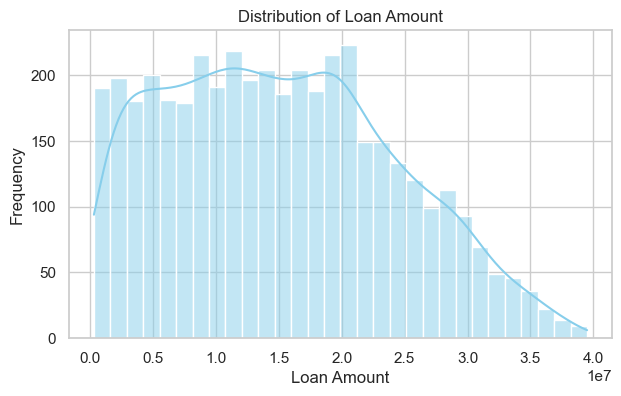

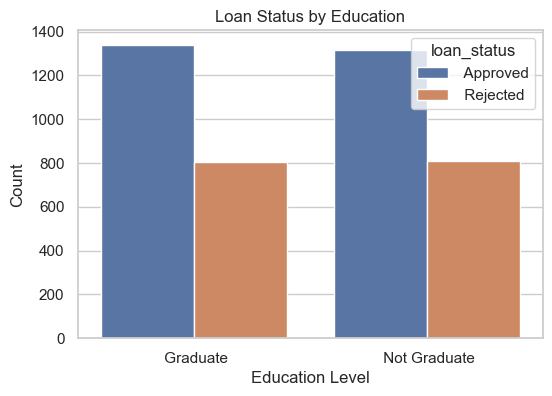

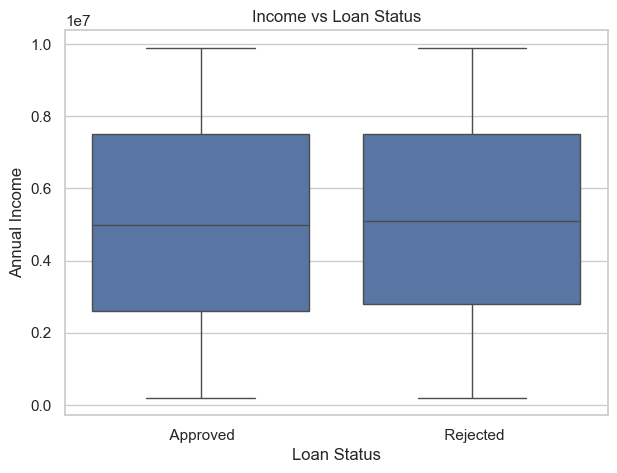

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set visual theme
sns.set(style="whitegrid")

# 1. Loan Amount Distribution
plt.figure(figsize=(7,4))
sns.histplot(df['loan_amount'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Loan Amount")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()

# 2. Education vs Loan Status
plt.figure(figsize=(6,4))
sns.countplot(x='education', hue='loan_status', data=df)
plt.title("Loan Status by Education")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.show()

# 3. Income vs Loan Status
plt.figure(figsize=(7,5))
sns.boxplot(x='loan_status', y='income_annum', data=df)
plt.title("Income vs Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Annual Income")
plt.show()



**Split Dataset into Training and Testing Sets**


In [15]:
# Features (X) and target (y)
X = df_encoded.drop(columns=['loan_id', 'loan_status'])  # Drop ID and target
y = df_encoded['loan_status']

# Split: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)


Training shape: (3415, 11)
Testing shape: (854, 11)


**Train Logistic Regression Model**


In [21]:
# STEP 1: Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# STEP 2: Clean column names again (very important if you haven't already)
df.columns = df.columns.str.strip()

# STEP 3: Encode categorical variables
le = LabelEncoder()
df['education'] = le.fit_transform(df['education'])             # Graduate=1, Not Graduate=0
df['self_employed'] = le.fit_transform(df['self_employed'])     # Yes=1, No=0
df['loan_status'] = le.fit_transform(df['loan_status'])         # Approved=0, Rejected=1

# STEP 4: Prepare feature matrix (X) and target vector (y)
X = df.drop(columns=['loan_id', 'loan_status'])  # Features (exclude ID and target)
y = df['loan_status']                            # Target

# STEP 5: Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 6: Initialize and train the logistic regression model
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)

# STEP 7: Make predictions on the test set
y_pred_log = log_model.predict(X_test)

# STEP 8: Evaluate the model
print("Accuracy of Logistic Regression:", accuracy_score(y_test, y_pred_log))

print("\n Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))

print("\n Classification Report:")
print(classification_report(y_test, y_pred_log))



Accuracy of Logistic Regression: 0.7985948477751756

 Confusion Matrix:
[[488  48]
 [124 194]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       536
           1       0.80      0.61      0.69       318

    accuracy                           0.80       854
   macro avg       0.80      0.76      0.77       854
weighted avg       0.80      0.80      0.79       854



**Train Decision Tree Model**


In [23]:
# STEP 1: Import required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# STEP 2: Initialize and train the decision tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# STEP 3: Predict on test data
y_pred_tree = tree_model.predict(X_test)

# STEP 4: Evaluate the model
print("Accuracy of Decision Tree:", accuracy_score(y_test, y_pred_tree))

print("\n Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))

print("\n Classification Report:")
print(classification_report(y_test, y_pred_tree))



Accuracy of Decision Tree: 0.977751756440281

 Confusion Matrix:
[[527   9]
 [ 10 308]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       536
           1       0.97      0.97      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



**Evaluate Decision Tree Model**


In [19]:
# Logistic Regression Evaluation
print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

# Decision Tree Evaluation
print("\n=== Decision Tree ===")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))


=== Logistic Regression ===
Accuracy: 0.7985948477751756
Confusion Matrix:
 [[488  48]
 [124 194]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.91      0.85       536
           1       0.80      0.61      0.69       318

    accuracy                           0.80       854
   macro avg       0.80      0.76      0.77       854
weighted avg       0.80      0.80      0.79       854


=== Decision Tree ===
Accuracy: 0.977751756440281
Confusion Matrix:
 [[527   9]
 [ 10 308]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       536
           1       0.97      0.97      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

